In [66]:
from google.colab import files
files.upload()


Saving diabetes_.csv to diabetes_ (5).csv


{'diabetes_ (5).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.2

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [83]:
df = pd.read_csv('diabetes_.csv')


print("Shape of dataset:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (768, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85     

In [84]:
# These columns should not be 0 in real life, so we replace 0 with median
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in invalid_cols:
    df[col] = df[col].replace(0, df[col].median())

print("Done fixing zeros")


Done fixing zeros


In [70]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (768, 8)
y shape: (768,)


In [71]:
def train_test_split_scratch(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 538 Test size: 230


In [85]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [73]:
def knn_predict_single(x_train, y_train, x_test, k):
    distances = []

    for i in range(len(x_train)):
        dist = euclidean_distance(x_test, x_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)


In [74]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for x in X_test:
        pred = knn_predict_single(X_train, y_train, x, k)
        predictions.append(pred)

    return np.array(predictions)


In [75]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [76]:
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)

print("Accuracy without scaling:", accuracy(y_test, y_pred))


Accuracy without scaling: 0.6739130434782609


In [77]:
def standardize_fit(X_train):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    return mean, std

def standardize_transform(X, mean, std):
    return (X - mean) / std


mean, std = standardize_fit(X_train)

X_train_s = standardize_transform(X_train, mean, std)
X_test_s = standardize_transform(X_test, mean, std)

print("Scaling done")


Scaling done


In [78]:
k = 5
y_pred_s = knn_predict(X_train_s, y_train, X_test_s, k)

print("Accuracy with scaling:", accuracy(y_test, y_pred_s))


Accuracy with scaling: 0.717391304347826


In [79]:
k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    start = time.time()
    y_pred = knn_predict(X_train, y_train, X_test, k)
    time_original.append(time.time() - start)
    acc_original.append(accuracy(y_test, y_pred))

    start = time.time()
    y_pred_s = knn_predict(X_train_s, y_train, X_test_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(accuracy(y_test, y_pred_s))

print("Experiment done")


Experiment done


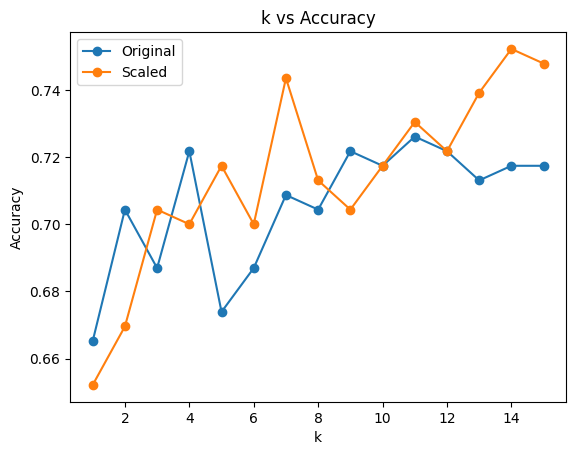

In [80]:
plt.figure()
plt.plot(list(k_values), acc_original, marker='o', label="Original")
plt.plot(list(k_values), acc_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.show()


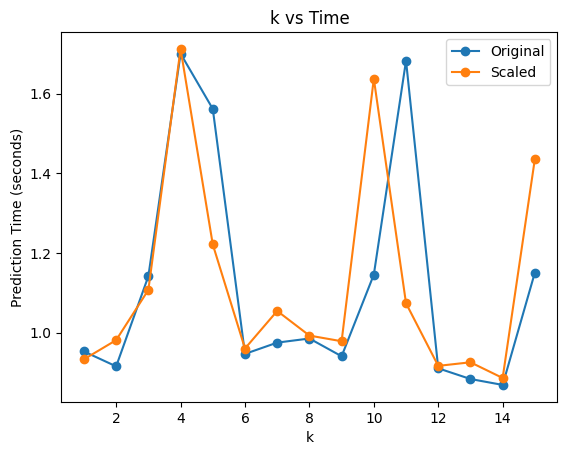

In [81]:
plt.figure()
plt.plot(list(k_values), time_original, marker='o', label="Original")
plt.plot(list(k_values), time_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Prediction Time (seconds)")
plt.title("k vs Time")
plt.legend()
plt.show()
